# Feature Engineering > Feature Transformation

## Outliers Handling

### Percentile (set percentile range based on business problem)

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load Data

In [2]:
#load data
df1=pd.read_csv('weight-height.csv')
#first 5 rows
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
#shape
df1.shape

(10000, 3)

In [4]:
#basic information(data-types, missing values)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


### Graphical Analysis

<AxesSubplot:xlabel='Height'>

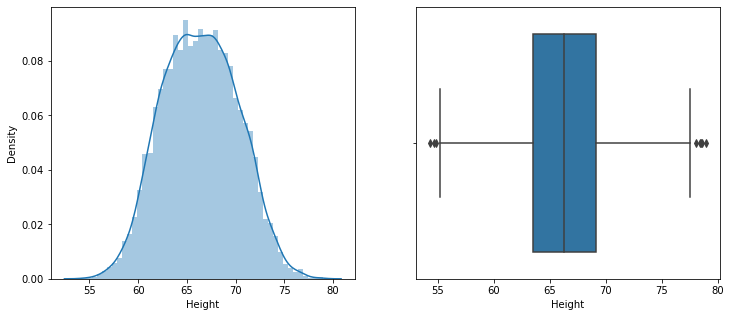

In [5]:
#distplot and boxplot of 'Weight'
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.distplot(df1['Height'])
plt.subplot(1,2,2)
sns.boxplot(df1['Height'])

#observation-->'Height' has more outliers so will focus on it for now.

<AxesSubplot:xlabel='Weight'>

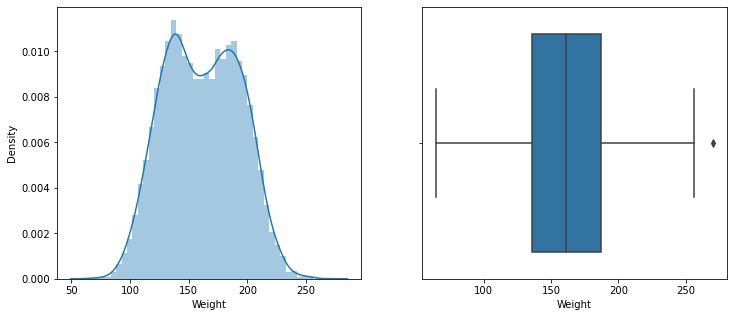

In [6]:
#distplot and boxplot of 'Weight'
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.distplot(df1['Weight'])
plt.subplot(1,2,2)
sns.boxplot(df1['Weight'])
            
#observation-->'Height' has more outliers so will focus on it for now.

**so here we will focus on 'Height' having more outliers than 'Weight'**

In [7]:
#statistical analysis of 'Height'
df1['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

### Percentile Set

In [8]:
per_99=df1['Height'].quantile(0.99) #99-percentile
per_01=df1['Height'].quantile(0.01) #1-percentile
print(per_01, per_99)

58.13441158671655 74.7857900583366


#### Trimming (remove outliers)

In [9]:
#range of percentiles [01-99]percentile
df1[(df1['Height']<per_01) | (df1['Height']>per_99)]
#observation-->200 rows in not in [1-99] percentile range

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [10]:
#data without outliers
df2=df1.drop(df1[(df1['Height']<per_01) | (df1['Height']>per_99)].index)
print(len(df2))
df2
#observation-->9800=(10000-200)rows

9800


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [11]:
#before trimming description of 'Height'
df1['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [12]:
#after trimming description of 'Height'
df2['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

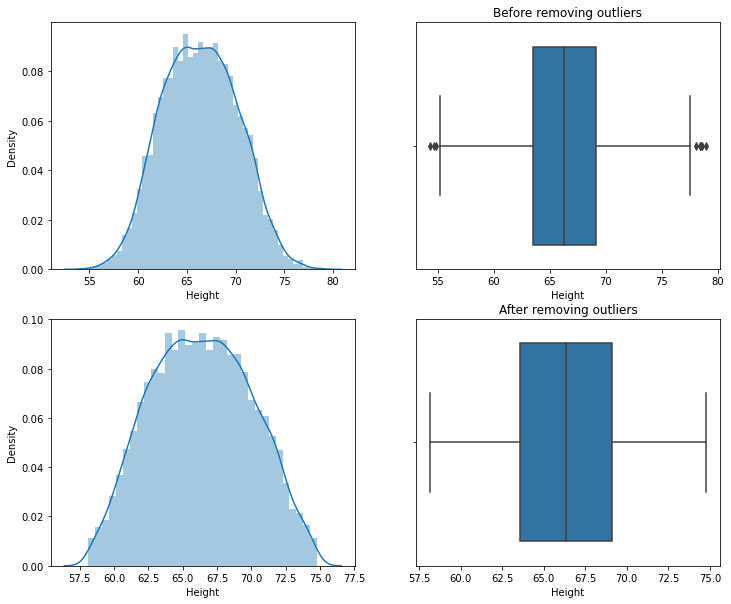

In [13]:
#distplot and boxplot of 'Height' before and after triming outliers

plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.distplot(df1['Height'])
plt.subplot(2,2,2)
sns.boxplot(df1['Height'])
plt.title("Before removing outliers", loc='center')

plt.subplot(2,2,3)
sns.distplot(df2['Height'])
plt.subplot(2,2,4)
sns.boxplot(df2['Height'])
plt.title("After removing outliers", loc='center')

plt.show()
#observation-->one outlier is still left(maybe data cleaning is required)

#### Capping (set lower and upper bound values to outliers)

In [14]:
#Capping
print(per_01, per_99)

58.13441158671655 74.7857900583366


In [15]:
#setting lower and upper limit values on outliers using np.where
df1['Height_new']=np.where(df1['Height']<per_01, per_01, np.where(df1['Height']>per_99, per_99, df1['Height']))

In [16]:
#'cgpa' and 'cgpa_new' data description
df1[['Height', 'Height_new']].describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.50562,66.31807,69.174262,78.998742
Height_new,10000.0,66.366281,3.795717,58.134412,63.50562,66.31807,69.174262,74.785790


In [17]:
#shape(no rows are removd here, instead outliers are set to new values)
df1.shape

(10000, 4)

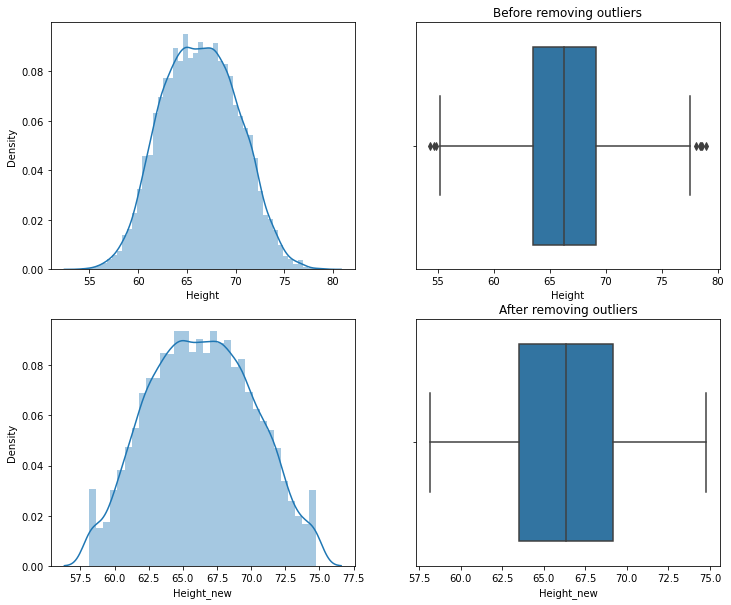

In [18]:
#distplot and boxplot of 'Height' before and after capping outliers

plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.distplot(df1['Height'])
plt.subplot(2,2,2)
sns.boxplot(df1['Height'])
plt.title("Before removing outliers", loc='center')

plt.subplot(2,2,3)
sns.distplot(df1['Height_new'])
plt.subplot(2,2,4)
sns.boxplot(df1['Height_new'])
plt.title("After removing outliers", loc='center')

plt.show()
#observation-->'Height' some outliers removed

**END of Document**